In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Function to read data from the file
def read_data(file_path):
    tau = []
    counts = []
    
    with open(file_path, 'r') as file:
        # Skip the header line
        next(file)
        
        # Read each line and split into tau and counts
        for line in file:
            # Split the line into columns
            columns = line.split()
            
            # Append the data to the respective lists
            tau.append(float(columns[0]))
            counts.append(int(columns[1]))
    
    # Convert lists to numpy arrays for better handling
    tau = np.array(tau)
    counts = np.array(counts)
    
    return tau, counts

In [3]:
# Function to plot the data
def plot_data(tau, counts, width=10, height=6):
    plt.figure(figsize=(width, height))
    plt.plot(tau, counts, marker='o', linestyle='-', color='b', markersize=3, linewidth=0.7)
    plt.title('Auto-correlation graph')
    plt.xlabel('Time differences (ps)')
    plt.ylabel('Counts per bin')
    plt.grid(True)
    plt.show()

In [4]:
# Function to plot normalized data
def plot_normalized_data(tau, counts, width=10, height=6):
    # Normalize counts by dividing by the mean
    counts_normalized = counts / np.mean(counts)
    
    plt.figure(figsize=(width, height))
    plt.plot(tau, counts_normalized, marker='o', linestyle='-', color='b', markersize=3, linewidth=0.7)
    plt.title('Normalized auto-correlation graph')
    plt.xlabel('Time differences (ps)')
    plt.ylabel('Normalized Counts')
    plt.grid(True)
    plt.show()

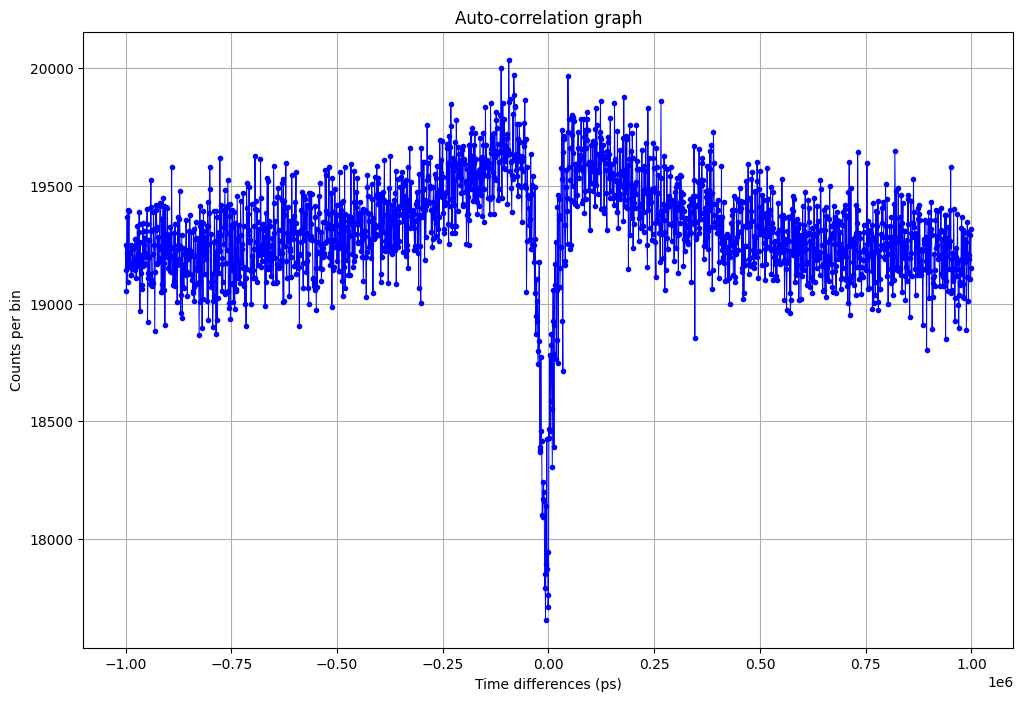

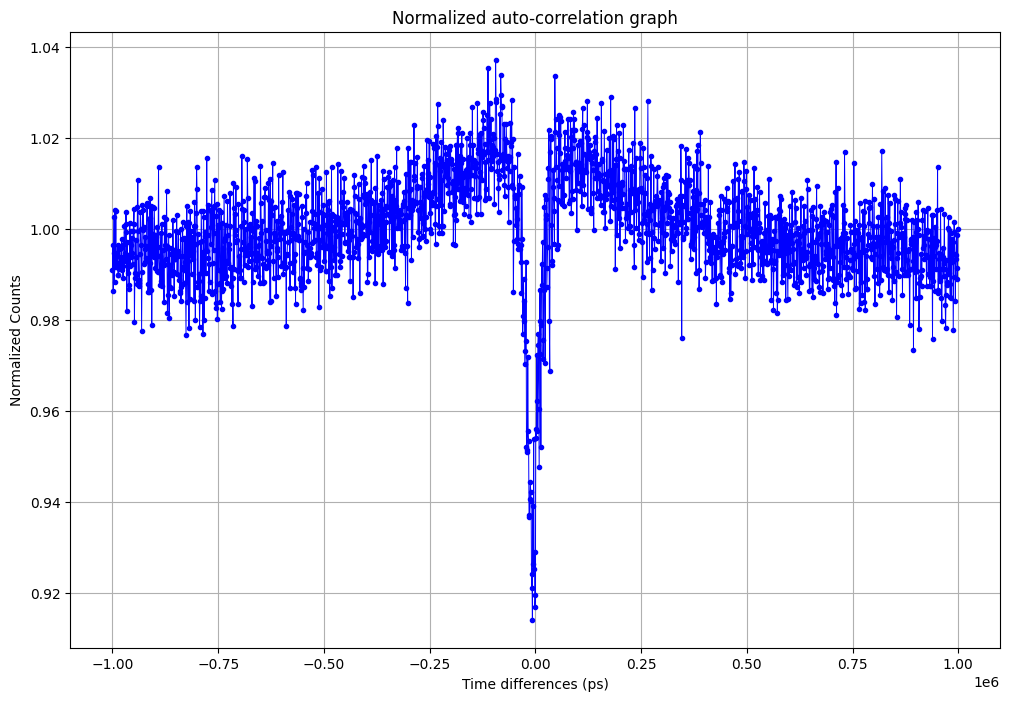

In [8]:
# Example usage
file_path = 'C:/Users/HP/Downloads/Data_FirstAntibunching.txt' 
tau, counts = read_data(file_path)

plot_data(tau, counts, width=12, height=8)

plot_normalized_data(tau, counts, width=12, height=8)

In [6]:

# Define the fitting function: 1 - C * exp(-2 * abs(tau - t0) / tau0)
def fitting_function(tau, t_0, tau_0, a, b):
    return a * (1 - b * np.exp(-2 * np.abs(tau - t_0) / tau_0))

# Function to normalize counts and fit the data
def normalize_and_fit(tau, counts):
    # Normalize counts by dividing by the mean
    counts_normalized = counts / np.mean(counts)
    
    # Perform the curve fitting
    popt, pcov = curve_fit(fitting_function, tau, counts_normalized, p0=[0, 1e5, 1, 1])
    
    # Extract fitted parameters
    t_0, tau_0, a, b = popt
    
    # Calculate the standard deviations of the parameters
    perr = np.sqrt(np.diag(pcov))
    error_t0, error_tau0, error_a, error_b = perr

    # Print fitted parameters and their errors
    print(f"Fitted parameters: t₀ = {t_0:.2f} ± {error_t0:.2f} ps")
    print(f"Lifetime = {tau_0 / 1000:.2f} ± {error_tau0 / 1000:.2f} ns")
    
    # Calculate g²(τ = t₀)
    value_at_t_0 = fitting_function(t_0, t_0, tau_0, a, b)
    error_value_at_t_0 = np.sqrt(error_a**2 + error_b**2)  # Estimate error propagation
    print(f"g²(τ = t₀) = {value_at_t_0:.3f} ± {error_value_at_t_0:.3f}")
    
    return t_0, tau_0, a, b, counts_normalized

# Function to plot the normalized data and the fitted curve
def plot_fit(tau, counts_normalized, t_0, tau_0, a, b, width=10, height=6):
    # Create the plot
    plt.figure(figsize=(width, height))
    
    # Plot normalized data
    plt.plot(tau, counts_normalized, marker='o', linestyle='-', color='b', label='Normalized Data', markersize=3, linewidth=0.7)
    plt.title('Normalized auto-correlation graph')
    
    # Generate the fitted curve
    tau_fine = np.linspace(min(tau), max(tau), 10000)
    fitted_curve = fitting_function(tau_fine, t_0, tau_0, a, b)
    
    # Plot fitted curve
    plt.plot(tau_fine, fitted_curve, 'r-', label=f'Fit: t₀={t_0:.2f}, τ₀={tau_0:.2f}')
    
    # Add title and labels
    plt.title('Normalized auto-correlation graph with fitted curve')
    plt.xlabel('Time differences (ps)')
    plt.ylabel('Normalized Counts')
    plt.legend()
    plt.grid(True)
    plt.show()


In [7]:
# Normalize and fit the data
t_0, tau_0, a, b, counts_normalized = normalize_and_fit(tau, counts)

# Plot the normalized data and the fitted curve
plot_fit(tau, counts_normalized, t_0, tau_0, a, b, width=12, height=8)

NameError: name 'tau' is not defined